In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

/home/berk/Desktop/Projects/CS229/C2/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


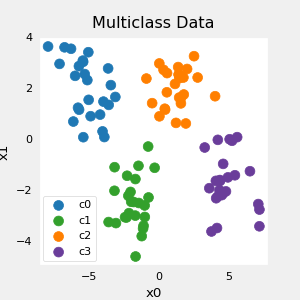

In [6]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [7]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [8]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200


E0000 00:00:1766756281.487471   95872 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1766756281.494645   95872 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8246  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6727 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5479 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4439 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3627 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2961 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2315 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1662 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1007 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0360 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9748 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9180 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8660 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8185 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7752 
Epoch 16/200
4/4 ━━━━━━━━━━━━━

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step


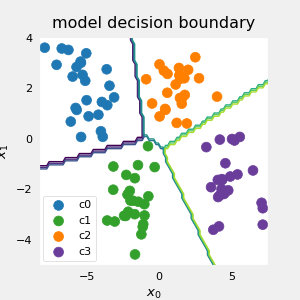

In [10]:
plt_cat_mc(X_train, y_train, model, classes)